# Introduction to Word Embeddings

## Sources

1. [https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795](https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795)

2. [https://towardsdatascience.com/creating-word-embeddings-coding-the-word2vec-algorithm-in-python-using-deep-learning-b337d0ba17a8](https://towardsdatascience.com/creating-word-embeddings-coding-the-word2vec-algorithm-in-python-using-deep-learning-b337d0ba17a8)

3. [http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

4. [http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/](http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/)

5. [https://radimrehurek.com/gensim/tutorial.html](https://radimrehurek.com/gensim/tutorial.html)

6. [https://nlp.stanford.edu/projects/glove/](https://nlp.stanford.edu/projects/glove/)

7. [https://www.kaggle.com/c/spooky-author-identification/discussion/44190](https://www.kaggle.com/c/spooky-author-identification/discussion/44190)

8. [Mikolov’s word2vec paper - Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf)

9. [Global Vectors for word Representation](https://nlp.stanford.edu/projects/glove/)

10. [POS Tagging](https://towardsdatascience.com/part-of-speech-tagging-for-beginners-3a0754b2ebba)

In the introduction to NLP, I touched upon sparse vs dense vectors and also discussed how documents can be represented in form of numbers using techniques like Count Vectorizer and TF-IDF. 

So what does the term **Word Embedding** means ? As per Wikipedia definition:
*the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers*

The idea behind all of the word embeddings is to capture with them as much of the semantical/morphological/context/hierarchical/etc. information as possible, but in practice one methods are definitely better than the other for a particular task. 

*Note: The problem of choosing the best embeddings for a particular project is always the problem of try-and-fail approach, so realizing why in particular case one model works better than the other sufficiently helps in real work.*

Count Vectorizer and TF-IDF are basic word embedding techniques which indeed uses statistical machine learning. So how neural network helps NLP ?

## Introduction to Word2Vec
Word2Vec is the first neural embedding model (or at least the first, which gained its popularity in 2013) and still the one, which is used by the most of researchers.

Word2Vec basically works on the logic of distance between words. Let's look into the following image:
![Word Vector](word-distances.png)

The most important feature of word embeddings is that similar words in a semantic sense have a smaller distance (either Euclidean, cosine or other) between them than words that have no semantic relationship. 

There are 3 different types of Word2Vec parameter learning, and all of them are based on the neural network model. Basically NN is used to learn the distance parameter between the words.


### Word2Vec Parameter Learning Types

#### One-Word Context
The intuition behind it is the fact that we’re considering one word per one context (we’re predicting one word given only one word); this approach is often referred to as **One Word CBOW model**.

![CBOW Model](cbow.png)

Given nearby words to the input words, the network is going to  predict the probability of input word.

#### Multi-Word Context
This model has no differences from the one-word context, except the type of probability distribution we want to obtain and the type of hidden layer we’re having. Interpretation of multi-word context is the fact that we’d like to predict multinomial distribution given not only one context word but rather many of them to store information about the relation of our target word to other words from the corpus.

![Multi-Word](cbow-mword.png)

#### Skip-Gram Model
Imagine the situation opposite to CBOW multi-word model: we’d like to predict context words having one target word on the input. Then, our objective we’re trying to approach changes dramatically.

![Skip-Gram Model](skip-gram.png)

Given a specific word in the middle of a sentence (the input word), look at the words nearby and pick one at random. The network is going to  predict the probability for every word in our vocabulary of being the “nearby word” that we chose.
“Nearby” is defined on the basis of a window size.

### Background of Word2Vec
Rather than using the simple one-hot encoding, or embedding, Tomas Mikolov in 2013 (working at Google at the time) came up with the idea of training a simple neural network (one with only linear activations – no sigmoid, relu, or other non-linear activations) to learn embeddings for words based on the context in which they are used.

Mikolov trained a network using a dictionary of the million most-frequently-used words in a training corpus consisting of the 6 billion words from Google News. An example vector space consisted of a set of 300 floating point values (there could be any number of these vector spaces, one is created each time the a word2vec network architecture is defined (via hyper parameters) and trained).

The most interesting thing about Mikolov’s 300-dimensional vector space, is that words with similar syntactic and semantic meanings tend to group near one another in various dimensions of the space. And, surprisingly, one can do simple vector math on the learned embedding vectors to explore these relationships. For example, if you train a network to learn a set of word embeddings, and you take the vector representing the word “King”, subtract the vector for the word “Man” and add the vector for the word “Woman” you will find that the word closest to the resulting vector in the word2vec vector space turns out to be “Queen”. 

Mikolov’s group trained their network using two different methods: Continuous Bag of Words (CBOW) and the skip-gram model. The CBOW method tries to guess a particular word based on the 4 words preceding the target word and the four words following the target word (the window size of 4 words is arbitrary, another hyper parameter, but Mikolov found that a +/- 4 window size was found to produce good results). Positive training examples were produced from the Google News corpus, negative examples were generated from random sets of preceding and following word

The skip-gram model turns this network on its head: rather than predicting the word that would lie between a set of preceding and succeeding words, the skip-gram model takes as input a single word and predicts, as output, the most likely set of words to precede and succeed the input word

It turns out that the skip-gram model actually does the better job at determining the “best” set of embeddings for a dictionary of words, where “best” means that the vector encodings for words in the dictionary end up being located in the 300-dimensional vector space such that words with similar syntactic and semantic meanings are located near one another in this vector space.

## Simple Example

To create word embeddings the first thing that is needed is text. Let us create a simple example stating some well-known facts about a fictional royal family containing 12 sentences (check sample.csv)

In [1]:
import itertools
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm

# Drawing the embeddings
import matplotlib.pyplot as plt

# Deep learning: 
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

from scipy import sparse

In [3]:
# Reading the text from the input folder
texts = pd.read_csv('sample.csv')
texts = [x for x in texts['text']]

In [4]:
texts

['The future king is the prince',
 'Daughter is the princess ',
 'Son is the prince',
 'Only a man can be a king ',
 'Only a woman can be a queen',
 'The princess will be a queen',
 'Queen and king rule the realm',
 'The prince is a strong man',
 'The princess is a beautiful woman ',
 'The royal family is the king and queen and their children',
 'Prince is only a boy now',
 'A boy will be a man']

In [5]:
# Define a text pre-processing method
def text_preprocessing(
    text:list,
    punctuations = r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
    stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will']
    )->list:
    """
    A method to preproces text
    """
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list (Tokens)
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x!='']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text

In [13]:
# Let's get the words list
word_lists = []
all_text = []

# Define the no. of words in the context (window)
window = 2

for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)

    # Appending to the all text list
    all_text += text 

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])

In [7]:
all_text

['future',
 'king',
 'prince',
 'daughter',
 'princess',
 'son',
 'prince',
 'only',
 'man',
 'can',
 'king',
 'only',
 'woman',
 'can',
 'queen',
 'princess',
 'queen',
 'queen',
 'king',
 'rule',
 'realm',
 'prince',
 'strong',
 'man',
 'princess',
 'beautiful',
 'woman',
 'royal',
 'family',
 'king',
 'queen',
 'their',
 'children',
 'prince',
 'only',
 'boy',
 'now',
 'boy',
 'man']

In [8]:
word_lists

[['future', 'king'],
 ['future', 'prince'],
 ['king', 'prince'],
 ['king', 'future'],
 ['prince', 'king'],
 ['prince', 'future'],
 ['daughter', 'princess'],
 ['princess', 'daughter'],
 ['son', 'prince'],
 ['prince', 'son'],
 ['only', 'man'],
 ['only', 'can'],
 ['man', 'can'],
 ['man', 'only'],
 ['man', 'king'],
 ['can', 'king'],
 ['can', 'man'],
 ['can', 'only'],
 ['king', 'can'],
 ['king', 'man'],
 ['only', 'woman'],
 ['only', 'can'],
 ['woman', 'can'],
 ['woman', 'only'],
 ['woman', 'queen'],
 ['can', 'queen'],
 ['can', 'woman'],
 ['can', 'only'],
 ['queen', 'can'],
 ['queen', 'woman'],
 ['princess', 'queen'],
 ['queen', 'princess'],
 ['queen', 'king'],
 ['queen', 'rule'],
 ['king', 'rule'],
 ['king', 'queen'],
 ['king', 'realm'],
 ['rule', 'realm'],
 ['rule', 'king'],
 ['rule', 'queen'],
 ['realm', 'rule'],
 ['realm', 'king'],
 ['prince', 'strong'],
 ['prince', 'man'],
 ['strong', 'man'],
 ['strong', 'prince'],
 ['man', 'strong'],
 ['man', 'prince'],
 ['princess', 'beautiful'],
 ['p

In [15]:
def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })

    return unique_word_dict    

In [16]:
unique_word_dict = create_unique_word_dict(all_text)

In [17]:
unique_word_dict

{'beautiful': 0,
 'boy': 1,
 'can': 2,
 'children': 3,
 'daughter': 4,
 'family': 5,
 'future': 6,
 'king': 7,
 'man': 8,
 'now': 9,
 'only': 10,
 'prince': 11,
 'princess': 12,
 'queen': 13,
 'realm': 14,
 'royal': 15,
 'rule': 16,
 'son': 17,
 'strong': 18,
 'their': 19,
 'woman': 20}

In [18]:
len(unique_word_dict)

21

In [19]:
# Defining the number of features (unique words)
n_words = len(unique_word_dict)

In [20]:
# Getting all the unique words 
words = list(unique_word_dict.keys())
words

['beautiful',
 'boy',
 'can',
 'children',
 'daughter',
 'family',
 'future',
 'king',
 'man',
 'now',
 'only',
 'prince',
 'princess',
 'queen',
 'realm',
 'royal',
 'rule',
 'son',
 'strong',
 'their',
 'woman']

In [23]:
word_lists

[['future', 'king'],
 ['future', 'prince'],
 ['king', 'prince'],
 ['king', 'future'],
 ['prince', 'king'],
 ['prince', 'future'],
 ['daughter', 'princess'],
 ['princess', 'daughter'],
 ['son', 'prince'],
 ['prince', 'son'],
 ['only', 'man'],
 ['only', 'can'],
 ['man', 'can'],
 ['man', 'only'],
 ['man', 'king'],
 ['can', 'king'],
 ['can', 'man'],
 ['can', 'only'],
 ['king', 'can'],
 ['king', 'man'],
 ['only', 'woman'],
 ['only', 'can'],
 ['woman', 'can'],
 ['woman', 'only'],
 ['woman', 'queen'],
 ['can', 'queen'],
 ['can', 'woman'],
 ['can', 'only'],
 ['queen', 'can'],
 ['queen', 'woman'],
 ['princess', 'queen'],
 ['queen', 'princess'],
 ['queen', 'king'],
 ['queen', 'rule'],
 ['king', 'rule'],
 ['king', 'queen'],
 ['king', 'realm'],
 ['rule', 'realm'],
 ['rule', 'king'],
 ['rule', 'queen'],
 ['realm', 'rule'],
 ['realm', 'king'],
 ['prince', 'strong'],
 ['prince', 'man'],
 ['strong', 'man'],
 ['strong', 'prince'],
 ['man', 'strong'],
 ['man', 'prince'],
 ['princess', 'beautiful'],
 ['p

In [24]:
# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)):
    # Print
    print(i,".", word_list)
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

84it [00:00, 5285.75it/s]

0 . ['future', 'king']
1 . ['future', 'prince']
2 . ['king', 'prince']
3 . ['king', 'future']
4 . ['prince', 'king']
5 . ['prince', 'future']
6 . ['daughter', 'princess']
7 . ['princess', 'daughter']
8 . ['son', 'prince']
9 . ['prince', 'son']
10 . ['only', 'man']
11 . ['only', 'can']
12 . ['man', 'can']
13 . ['man', 'only']
14 . ['man', 'king']
15 . ['can', 'king']
16 . ['can', 'man']
17 . ['can', 'only']
18 . ['king', 'can']
19 . ['king', 'man']
20 . ['only', 'woman']
21 . ['only', 'can']
22 . ['woman', 'can']
23 . ['woman', 'only']
24 . ['woman', 'queen']
25 . ['can', 'queen']
26 . ['can', 'woman']
27 . ['can', 'only']
28 . ['queen', 'can']
29 . ['queen', 'woman']
30 . ['princess', 'queen']
31 . ['queen', 'princess']
32 . ['queen', 'king']
33 . ['queen', 'rule']
34 . ['king', 'rule']
35 . ['king', 'queen']
36 . ['king', 'realm']
37 . ['rule', 'realm']
38 . ['rule', 'king']
39 . ['rule', 'queen']
40 . ['realm', 'rule']
41 . ['realm', 'king']
42 . ['prince', 'strong']
43 . ['prince', 

In [25]:
word_lists[0][0]

'future'

In [26]:
unique_word_dict.get(word_lists[0][0])

6

In [27]:
unique_word_dict['future']

6

In [28]:
X

[array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
      

In [29]:
 Xmat = np.array(X)
 Xmat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
Ymat = np.array(Y)
Ymat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

*Note: Context — the words or ideas expressed before and after— provides us with the information we need to fully understand, evaluate or interpret the ideas in the passage*

In [31]:
# Converting the matrices into a sparse format because the vast majority of the data are 0s
sparseX = sparse.csr_matrix(Xmat)
sparseY = sparse.csr_matrix(Ymat)

In [32]:
sparseX

<84x21 sparse matrix of type '<class 'numpy.float64'>'
	with 84 stored elements in Compressed Sparse Row format>

In [53]:
sparseY

<84x21 sparse matrix of type '<class 'numpy.float64'>'
	with 84 stored elements in Compressed Sparse Row format>

In [33]:
print(sparseX)

  (0, 6)	1.0
  (1, 6)	1.0
  (2, 7)	1.0
  (3, 7)	1.0
  (4, 11)	1.0
  (5, 11)	1.0
  (6, 4)	1.0
  (7, 12)	1.0
  (8, 17)	1.0
  (9, 11)	1.0
  (10, 10)	1.0
  (11, 10)	1.0
  (12, 8)	1.0
  (13, 8)	1.0
  (14, 8)	1.0
  (15, 2)	1.0
  (16, 2)	1.0
  (17, 2)	1.0
  (18, 7)	1.0
  (19, 7)	1.0
  (20, 10)	1.0
  (21, 10)	1.0
  (22, 20)	1.0
  (23, 20)	1.0
  (24, 20)	1.0
  :	:
  (59, 7)	1.0
  (60, 7)	1.0
  (61, 7)	1.0
  (62, 7)	1.0
  (63, 13)	1.0
  (64, 13)	1.0
  (65, 13)	1.0
  (66, 13)	1.0
  (67, 19)	1.0
  (68, 19)	1.0
  (69, 19)	1.0
  (70, 3)	1.0
  (71, 3)	1.0
  (72, 11)	1.0
  (73, 11)	1.0
  (74, 10)	1.0
  (75, 10)	1.0
  (76, 10)	1.0
  (77, 1)	1.0
  (78, 1)	1.0
  (79, 1)	1.0
  (80, 9)	1.0
  (81, 9)	1.0
  (82, 1)	1.0
  (83, 8)	1.0


In [34]:
print(sparseY)

  (0, 7)	1.0
  (1, 11)	1.0
  (2, 11)	1.0
  (3, 6)	1.0
  (4, 7)	1.0
  (5, 6)	1.0
  (6, 12)	1.0
  (7, 4)	1.0
  (8, 11)	1.0
  (9, 17)	1.0
  (10, 8)	1.0
  (11, 2)	1.0
  (12, 2)	1.0
  (13, 10)	1.0
  (14, 7)	1.0
  (15, 7)	1.0
  (16, 8)	1.0
  (17, 10)	1.0
  (18, 2)	1.0
  (19, 8)	1.0
  (20, 20)	1.0
  (21, 2)	1.0
  (22, 2)	1.0
  (23, 10)	1.0
  (24, 13)	1.0
  :	:
  (59, 13)	1.0
  (60, 5)	1.0
  (61, 19)	1.0
  (62, 15)	1.0
  (63, 19)	1.0
  (64, 7)	1.0
  (65, 3)	1.0
  (66, 5)	1.0
  (67, 3)	1.0
  (68, 13)	1.0
  (69, 7)	1.0
  (70, 19)	1.0
  (71, 13)	1.0
  (72, 10)	1.0
  (73, 1)	1.0
  (74, 1)	1.0
  (75, 11)	1.0
  (76, 9)	1.0
  (77, 9)	1.0
  (78, 10)	1.0
  (79, 11)	1.0
  (80, 1)	1.0
  (81, 10)	1.0
  (82, 8)	1.0
  (83, 1)	1.0


In [35]:
Xmat.shape, sparseX.shape

((84, 21), (84, 21))

In [57]:
Ymat.shape, sparseY.shape

((84, 21), (84, 21))

In [36]:
from tensorflow import data
from tensorflow import sparse as tfsparse

sparsedata1 = data.Dataset.from_tensor_slices(tfsparse.from_dense(X))
sparsedata2 = data.Dataset.from_tensor_slices(tfsparse.from_dense(Y))
sparsedata = data.Dataset.zip((sparsedata1, sparsedata2))
sparsedata

2022-02-19 11:11:35.376699: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<ZipDataset shapes: ((21,), (21,)), types: (tf.float64, tf.float64)>

In [37]:
# Defining the size of the embedding
embed_size = 2

In [38]:
# Defining the neural network
inp = Input(shape=(Xmat.shape[1],), sparse=True)
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Ymat.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [39]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense (Dense)               (None, 2)                 44        
                                                                 
 dense_1 (Dense)             (None, 21)                63        
                                                                 
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Train the network
# Optimizing the network weights
model.fit(
    Xmat, 
    Ymat,
    batch_size=128,
    epochs=1000
    )

Epoch 1/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.3464
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.3461
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.3457
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.3454
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.3450
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 2.3447
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.3444
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.3440
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 2.3437
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.3433
Epoch 11/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.3430
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.3426
Epoch 13/1000
1/1 [==============================

In [47]:
# Obtaining the weights from the neural network. 
# These are the so called word embeddings

# The input layer 
weights = model.get_weights()[0]

In [48]:
weights

array([[-0.07123905,  2.4380836 ],
       [-1.815615  , -1.4439255 ],
       [-0.6349506 ,  0.13138902],
       [ 2.029552  , -1.4671718 ],
       [ 0.5121746 ,  2.2810001 ],
       [ 1.618512  , -1.406491  ],
       [ 0.5171001 , -1.664434  ],
       [ 1.0196612 , -1.6181072 ],
       [-0.8792385 , -0.19062364],
       [-1.911151  ,  0.43057895],
       [-0.89000255, -0.4970898 ],
       [-0.90667224, -0.01986614],
       [-0.50355524,  1.3131021 ],
       [ 0.95537007,  1.1700597 ],
       [ 1.6584036 ,  0.6820795 ],
       [ 2.1867015 ,  0.755165  ],
       [ 1.897126  , -1.6354768 ],
       [-0.5610912 , -2.5070395 ],
       [-0.80272925, -2.0064895 ],
       [ 1.2662498 ,  0.88617635],
       [-0.4935944 ,  0.8892413 ]], dtype=float32)

In [49]:
# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

In [44]:
embedding_dict

{'beautiful': array([-0.12257159,  1.5077691 ], dtype=float32),
 'boy': array([-1.00115  , -1.5310209], dtype=float32),
 'can': array([-0.67640066, -0.15754469], dtype=float32),
 'children': array([ 1.079893 , -1.0802128], dtype=float32),
 'daughter': array([1.0010307, 1.2856069], dtype=float32),
 'family': array([ 1.0774705, -0.9065367], dtype=float32),
 'future': array([ 0.86754084, -1.2433966 ], dtype=float32),
 'king': array([ 1.0283898, -1.1107153], dtype=float32),
 'man': array([-0.80846524,  0.08065169], dtype=float32),
 'now': array([-1.1050286,  1.240162 ], dtype=float32),
 'only': array([-0.97953755, -1.1566918 ], dtype=float32),
 'prince': array([-0.7268636 ,  0.96555555], dtype=float32),
 'princess': array([-0.96861625, -0.05971826], dtype=float32),
 'queen': array([0.8137741, 0.7471254], dtype=float32),
 'realm': array([0.99192864, 0.51618326], dtype=float32),
 'royal': array([1.4910529 , 0.53000516], dtype=float32),
 'rule': array([ 1.3923702 , -0.88041365], dtype=float32

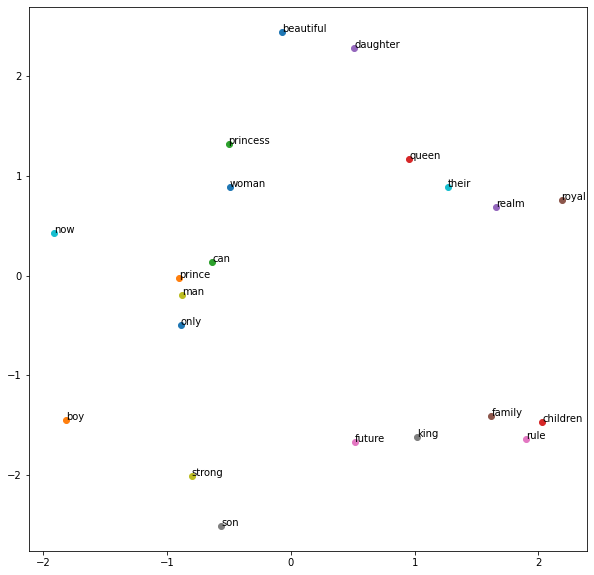

In [50]:
# Ploting the embeddings
plt.figure(figsize=(10, 10))
for word in list(unique_word_dict.keys()):
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))    

In [51]:
# Saving the embedding vector to a txt file
with open(f'embedding.txt', 'w') as f:
    for key, value in embedding_dict.items():
        try:
            f.write(f'{key}: {value}\n')   
        except Exception as e:
            print(f'Cannot write word {key} to dict: {e}')     

## POS Tagging

Part-of-speech (POS) tagging is a popular Natural Language Processing process which refers to categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context.

Let's take an example:
**"Why not tell someone ?"**

Here **Why** is Adverb, **tell** is verb, **someone** is noun, **?** is punctuation. These categories can be called as tags. Basically tag the words with part of speech. Part-of-speech tags describe the characteristic structure of lexical terms within a sentence or text, therefore, we can use them for making assumptions about semantics.

Imagine the sentence is truncated to “Why not tell … ” and we want to determine whether the following word in the sentence is a noun, verb, adverb, or some other part-of-speech. An English speaking person can easily tell the following word will be a noun.

Therefore, the idea as shown in this example is that the POS tag that is assigned to the next word is dependent on the POS tag of the previous word.

![POS](pos.png)

By associating numbers with each arrow direction, of which imply the likelihood of the next word given the current word, we can say there is a higher likelihood the next word in our sentence would be a noun since it has a higher likelihood than the next word being a verb if we are currently on a verb. This is a great example on how Markov Model works

**Markov Model** is a stochastic model used to model randomly changing systems. It is assumed that future states depend only on the current state, not on the events that occurred before it (that is, it assumes the Markov property).

We can depict a markov chain as directed graph:

![Markov Chain](MarkovChain.png)

**Hidden Markov Model** is a statistical Markov model in which the system being modeled is assumed to be a Markov process with unobservable (“hidden”) states. In our case, the unobservable states are the POS tags of a word.

### Other Applications of POS Tagging
- Named Entity Recognition (NER)
- Co-reference Resolution
- Speech Recognition